In [1]:
import numpy as np
import scipy as sp
import datajoint as dj

In [2]:
dj.config['database.host'] = 'mesoscale-activity.datajoint.io'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking, psth
from pipeline.plot import unit_characteristic_plot

Please enter DataJoint username:  thinh
Please enter DataJoint password:  ·····················


Connecting thinh@mesoscale-activity.datajoint.io:3306


In [24]:
import warnings
warnings.filterwarnings('ignore')

# Retrieve a Session/Probe Insertion

In [7]:
ephys.ProbeInsertion * ephys.ProbeInsertion.InsertionLocation & psth.UnitSelectivity 

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name,brain_location_name unique name of this brain location (could be hash of the non-primary attr),ml_location um from ref ; right is positive; based on manipulator coordinates/reconstructed track,ap_location um from ref; anterior is positive; based on manipulator coordinates/reconstructed track,dv_location um from dura; ventral is positive; based on manipulator coordinates/reconstructed track,ml_angle Angle between the manipulator/reconstructed track and the Medio-Lateral axis. A tilt towards the right hemishpere is positive.,ap_angle Angle between the manipulator/reconstructed track and the Anterior-Posterior axis. An anterior tilt is positive.
412330,15,1,15131808323,npx_first384,right_alm,nan,nan,nan,nan,nan
412330,15,2,15131808323,npx_first384,right_medulla,nan,nan,nan,nan,nan
412753,41,1,15131808323,npx_first384,right_alm,nan,nan,nan,nan,nan
412753,41,2,15131808323,npx_first384,right_thalamus,nan,nan,nan,nan,nan
413950,20,2,15131808323,npx_first384,left_thalamus,nan,nan,nan,nan,nan
413950,21,1,15131808323,npx_first384,left_alm,nan,nan,nan,nan,nan
413950,21,2,15131808323,npx_first384,left_thalamus,nan,nan,nan,nan,nan
432572,9,2,15131808323,npx_first384,left_medulla,nan,nan,nan,nan,nan
432572,10,2,15131808323,npx_first384,left_medulla,nan,nan,nan,nan,nan
432572,14,1,15131808323,npx_first384,left_alm,nan,nan,nan,nan,nan


In [8]:
insertion_key1 = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 1}).fetch1('KEY')

In [9]:
insertion_key2 = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 2}).fetch1('KEY')

In [11]:
print(insertion_key1)

{'subject_id': 412330, 'session': 15, 'insertion_number': 1}


# Plot Clustering Quality

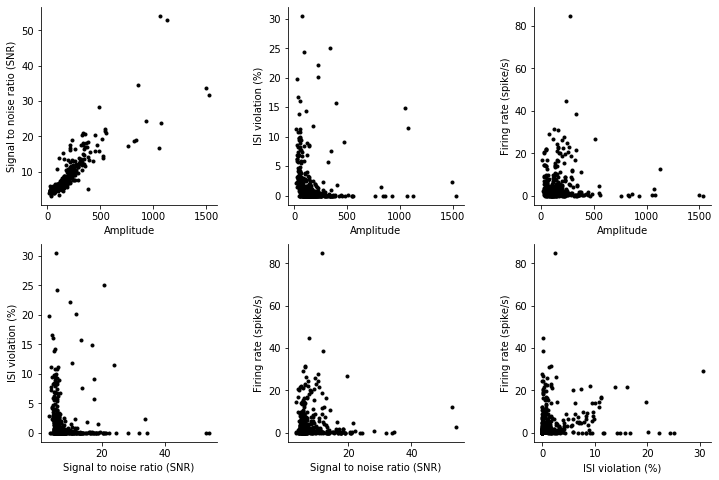

In [12]:
unit_characteristic_plot.plot_clustering_quality(insertion_key1)

# Plot unit characteristic - overlay on probe

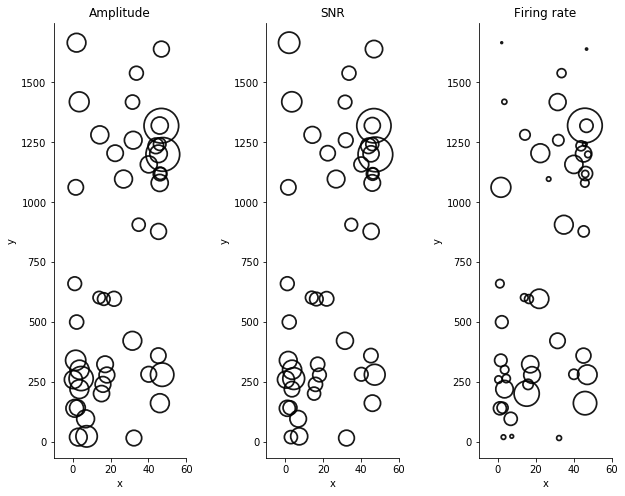

In [13]:
unit_characteristic_plot.plot_unit_characteristic(insertion_key1)

# Plot unit selectivity - overlay on probe

### Ipsi: red - Contra: blue

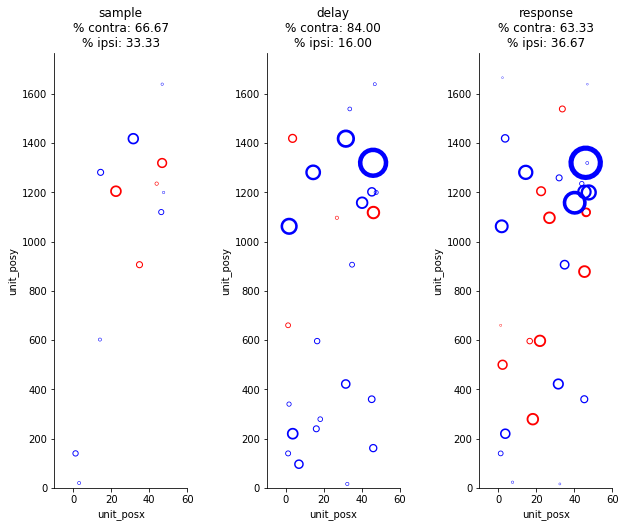

In [14]:
unit_characteristic_plot.plot_unit_selectivity(insertion_key1)

# Plot effect of bilateral photostim perturbation - overlay on probe

/opt/conda/lib/python3.7/site-packages/pipeline/plot/unit_characteristic_plot.py:164: RuntimeWarning: invalid value encountered in double_scalars
  frate_change = np.abs(stim_frate.mean() - ctrl_frate.mean()) / ctrl_frate.mean()


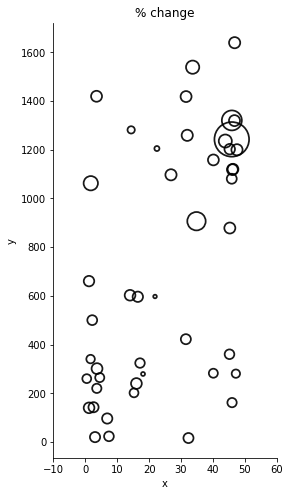

In [16]:
unit_characteristic_plot.plot_unit_bilateral_photostim_effect(insertion_key1)

# Plot unit PSTHs difference - categorized by selectivity

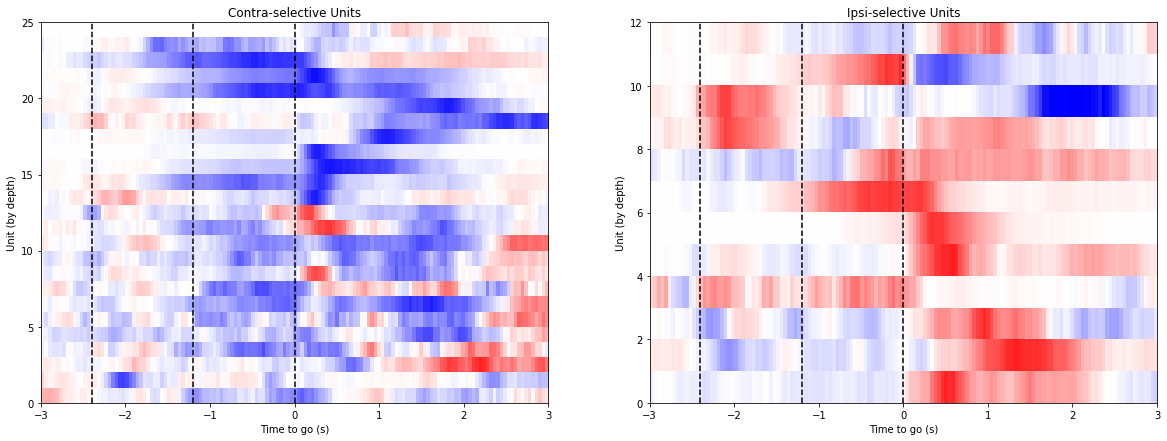

In [17]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(insertion_key1)

# Plot average PSTH categorized by selectivity

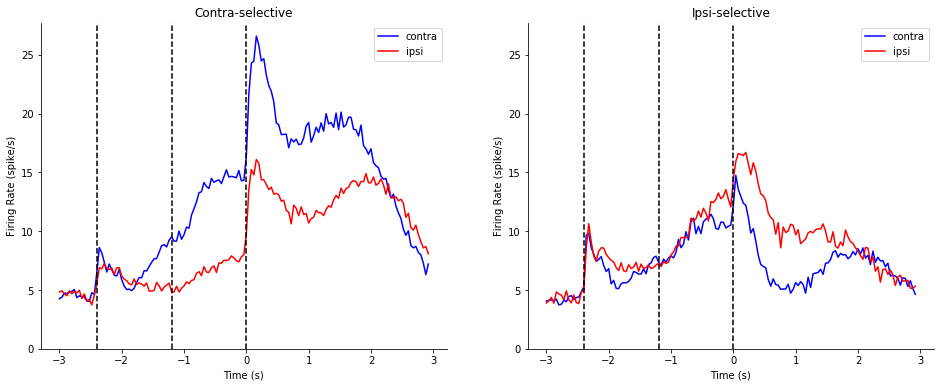

In [18]:
unit_characteristic_plot.plot_avg_contra_ipsi_psth(insertion_key1)

# Plot average PSTH - effect of bilateral perturbation

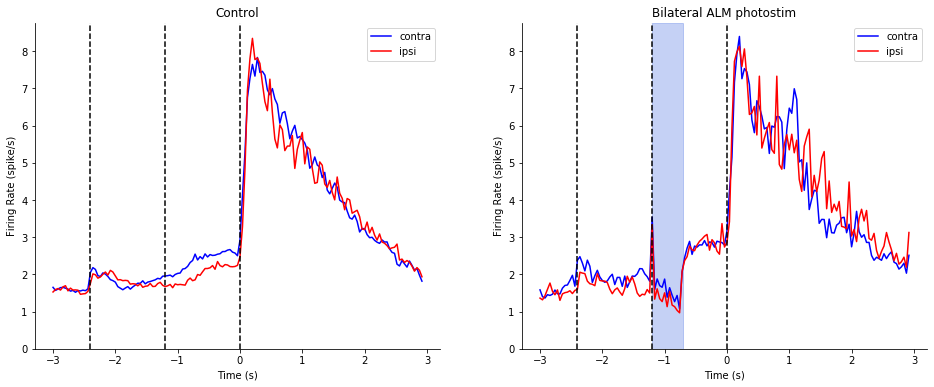

In [19]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(insertion_key1)

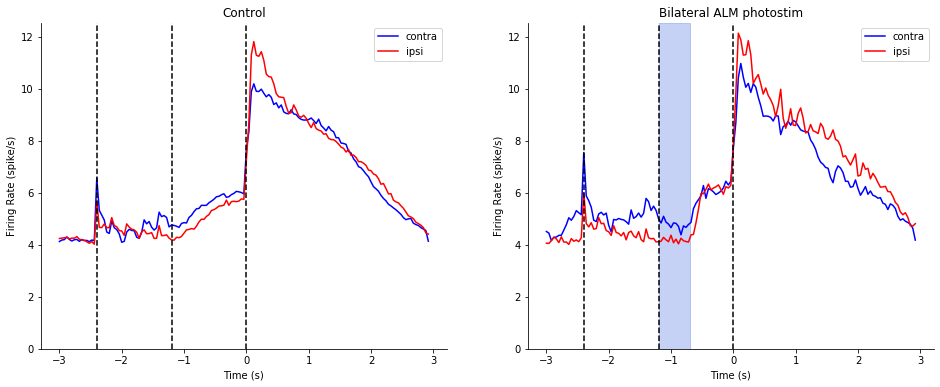

In [20]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(insertion_key2)

# Plot trial psth projected on the coding direction vector

### CD vector is calculated for:
+ the specified **units**
+ the specified **time_period**

### Plot trial-to-trial CD-endpoint correlation between two unit groups

In [22]:
units_1 = psth.UnitSelectivity & insertion_key1 & 'unit_selectivity != "non-selective"'
units_2 = psth.UnitSelectivity & insertion_key2 & 'unit_selectivity != "non-selective"'

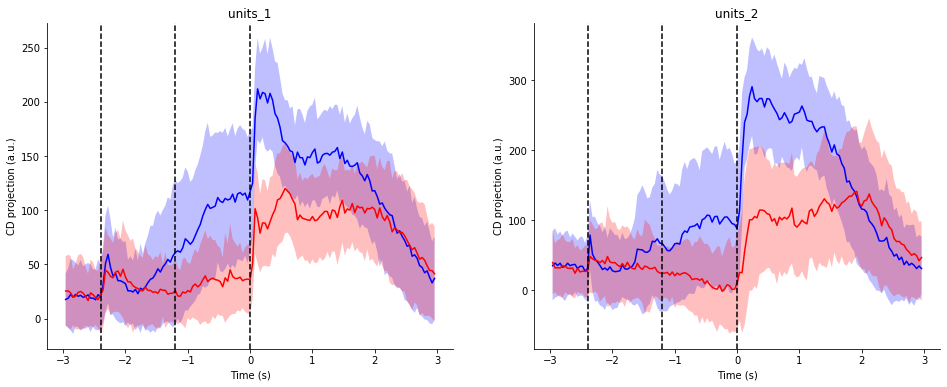

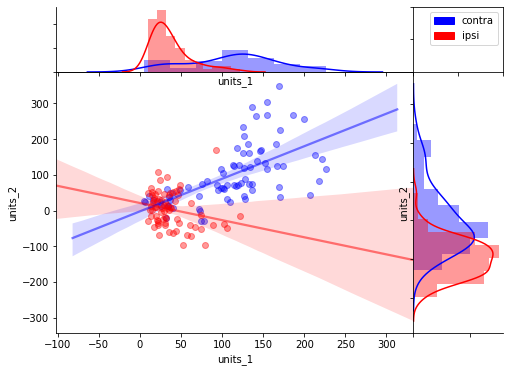

In [25]:
unit_characteristic_plot.plot_paired_coding_direction(units_1, units_2, labels=('units_1', 'units_2'), time_period=(-0.4, 0))

# ==================================================